In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Introduction
This dataset offers a comprehensive snapshot of criminal activities within the city. It encompasses various aspects of each incident, including date, time, location, victim demographics, and more.

By leveraging machine learning techniques, participants can analyze this rich dataset to predict crime categories, enhance law enforcement strategies, and bolster public safety measures.

Your task is straightforward: Develop models capable of accurately predicting the crime categories based on this information.

# Columns Description:

* Location: Street address of the crime incident.
* Cross_Street: Cross street of the rounded address.
* Latitude: Latitude coordinates of the crime incident.
* Longitude: Longitude coordinates of the crime incident.
* Date_Reported: Date the incident was reported.
* Date_Occurred: Date the incident occurred.
* Time_Occurred: Time the incident occurred in 24-hour military time.
* Area_ID: LAPD's Geographic Area number.
* Area_Name: Name designation of the LAPD Geographic Area.
* Reporting_District_no: Reporting district number.
* Part 1-2: Crime classification.
* Modus_Operandi: Activities associated with the suspect.
* Victim_Age: Age of the victim.
* Victim_Sex: Gender of the victim.
* Victim_Descent: Descent code of the victim.
* Premise_Code: Premise code indicating the location of the crime.
* Premise_Description: Description of the premise code.
* Weapon_Used_Code: Weapon code indicating the type of weapon used.
* Weapon_Description: Description of the weapon code.
* Status: Status of the case.
* Status_Description: Description of the status code.
* Crime_Category: The category of the crime (Target Variable)

# Import necessary libraries


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures, OrdinalEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

--------------------

# Load the datasets

In [8]:
# Reading the training and testing data from csv files provided
orig_train_data=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
orig_test_data=pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [9]:
# Create a copy of the training and testing data
train_data=orig_train_data.copy()
test_data=orig_test_data.copy()

In [10]:
# Printing the shape of training and testing data
print("training data shape =",train_data.shape)
print("testing data shape =",test_data.shape)

training data shape = (20000, 22)
testing data shape = (5000, 21)


---------------

# Perform EDA (Exploratory Data Analysis)

In [11]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [12]:
test_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [13]:
# Print information about the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [14]:
# Print information about the testing data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

### As you can see the data types of the attributes are object and float64 type

In [15]:
train_data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [16]:
# For categorical column
train_data.describe(include="object")

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
count,20000,3448,20000,20000,20000,17259,17376,17376,19995,7335,20000,20000,20000
unique,12399,1495,811,366,21,10489,4,17,216,57,5,5,6
top,6TH,BROADWAY,07/13/2020 12:00:00 AM,01/01/2020 12:00:00 AM,77th Street,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
freq,33,56,87,137,1345,826,8538,6143,5033,3990,15236,15236,11666


In [17]:
train_data['Location'].value_counts()

Location
6TH                                        33
7TH                                        32
VERMONT                      AV            31
6TH                          ST            31
7TH                          ST            30
                                           ..
2700 E  1ST                          ST     1
9300    SWINTON                      AV     1
MCKINLEY                                    1
WADE                         ST             1
DALTON                       AV             1
Name: count, Length: 12399, dtype: int64

In [18]:
train_data['Cross_Street'].value_counts()

Cross_Street
BROADWAY                           56
FIGUEROA                           43
VERMONT                      AV    40
FIGUEROA                     ST    34
MAIN                               33
                                   ..
VENTURA CANYON               BL     1
E  ORLANDO                          1
D                            ST     1
CABRILLO                     AV     1
HAVELOCK                            1
Name: count, Length: 1495, dtype: int64

In [19]:
train_data['Date_Reported'].value_counts()

Date_Reported
07/13/2020 12:00:00 AM    87
06/16/2020 12:00:00 AM    83
03/04/2020 12:00:00 AM    77
01/17/2020 12:00:00 AM    75
09/04/2020 12:00:00 AM    74
                          ..
04/06/2022 12:00:00 AM     1
12/15/2021 12:00:00 AM     1
10/20/2022 12:00:00 AM     1
12/27/2022 12:00:00 AM     1
12/19/2021 12:00:00 AM     1
Name: count, Length: 811, dtype: int64

In [20]:
train_data['Date_Occurred'].value_counts()

Date_Occurred
01/01/2020 12:00:00 AM    137
03/01/2020 12:00:00 AM     92
05/30/2020 12:00:00 AM     87
06/01/2020 12:00:00 AM     85
08/01/2020 12:00:00 AM     81
                         ... 
06/22/2020 12:00:00 AM     36
12/16/2020 12:00:00 AM     35
05/22/2020 12:00:00 AM     33
07/26/2020 12:00:00 AM     30
11/12/2020 12:00:00 AM     28
Name: count, Length: 366, dtype: int64

In [21]:
train_data['Area_Name'].value_counts()

Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64

In [22]:
train_data['Modus_Operandi'].value_counts()

Modus_Operandi
0344                                       826
0329                                       583
1501                                       187
0329 1300                                  135
0325                                       127
                                          ... 
1609 0329 1307 0344                          1
0344 2050 0910 2034                          1
0400 2000 0913                               1
1822 0342 0910 2049 2051 0305 0444 0344      1
1202 2038 0913 0602 1242 0553                1
Name: count, Length: 10489, dtype: int64

In [23]:
train_data['Victim_Sex'].value_counts()

Victim_Sex
M    8538
F    7176
X    1660
H       2
Name: count, dtype: int64

In [24]:
train_data['Victim_Descent'].value_counts()

Victim_Descent
H    6143
W    4245
B    2881
X    1849
O    1603
A     427
K      83
C      51
F      48
J      16
I      11
V       8
P       4
Z       3
U       2
D       1
G       1
Name: count, dtype: int64

In [25]:
train_data['Premise_Description'].value_counts()

Premise_Description
STREET                                          5033
SINGLE FAMILY DWELLING                          3379
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    2491
PARKING LOT                                     1437
SIDEWALK                                         978
                                                ... 
BUS DEPOT/TERMINAL, OTHER THAN MTA                 1
MTA - RED LINE - HOLLYWOOD/WESTERN                 1
MTA - SILVER LINE - ROSECRANS                      1
HIGH-RISE BUILDING                                 1
COMPUTER SERVICES/REPAIRS/SALES                    1
Name: count, Length: 216, dtype: int64

In [26]:
train_data['Weapon_Description'].value_counts()

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990
UNKNOWN WEAPON/OTHER WEAPON                        789
VERBAL THREAT                                      546
HAND GUN                                           388
KNIFE WITH BLADE 6INCHES OR LESS                   160
SEMI-AUTOMATIC PISTOL                              154
UNKNOWN FIREARM                                    131
OTHER KNIFE                                        125
VEHICLE                                             84
MACE/PEPPER SPRAY                                   80
ROCK/THROWN OBJECT                                  63
BOTTLE                                              55
PIPE/METAL PIPE                                     52
CLUB/BAT                                            51
STICK                                               49
KITCHEN KNIFE                                       45
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH            43
AIR PISTOL/REVOLVER/RIFLE/BB GUN              

In [27]:
train_data['Status'].value_counts()

Status
IC    15236
AO     2597
AA     2054
JA       70
JO       43
Name: count, dtype: int64

In [28]:
train_data['Status_Description'].value_counts()

Status_Description
Invest Cont     15236
Adult Other      2597
Adult Arrest     2054
Juv Arrest         70
Juv Other          43
Name: count, dtype: int64

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64


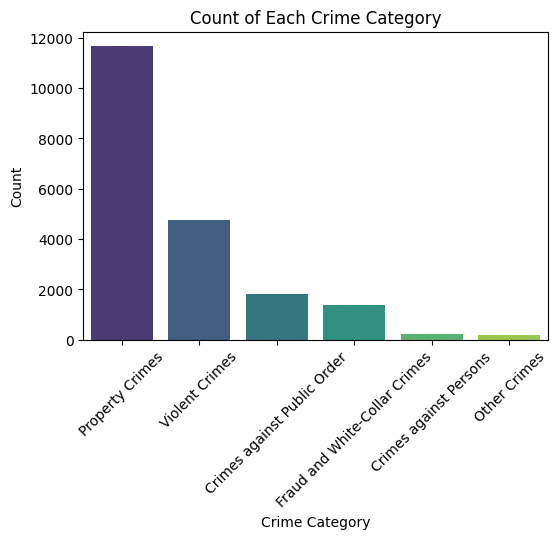

In [29]:
# Printing the number of observations of each crime category
category_counts = train_data['Crime_Category'].value_counts()

print(category_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Count of Each Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Through this plot, we can observe that the majority of crimes are classified as property crimes.

In [30]:
print(train_data['Victim_Age'].min())
print(test_data['Victim_Age'].min())

-2.0
-2.0


In [31]:
median_age_by_sex_train=train_data.groupby( 'Victim_Sex').median(numeric_only=True)['Victim_Age']
median_age_by_sex_train

Victim_Sex
F    35.0
H    30.5
M    37.0
X     0.0
Name: Victim_Age, dtype: float64

In [32]:
median_age_by_sex_test=test_data.groupby( 'Victim_Sex').median(numeric_only=True)['Victim_Age']
median_age_by_sex_test

Victim_Sex
F    35.0
H    45.0
M    37.0
X     0.0
Name: Victim_Age, dtype: float64

In [33]:
def replace_negative_age_train(row):
    if row['Victim_Age'] <= 0:
        return median_age_by_sex_train.get(row['Victim_Sex'], row['Victim_Age'])
    return row['Victim_Age']

def replace_negative_age_test(row):
    if row['Victim_Age'] <= 0:
        return median_age_by_sex_test.get(row['Victim_Sex'], row['Victim_Age'])
    return row['Victim_Age']

# Apply the function to replace negative values in Victim_Age
train_data['Victim_Age'] = train_data.apply(replace_negative_age_train, axis=1)
test_data['Victim_Age'] = test_data.apply(replace_negative_age_test, axis=1)

In [34]:
print(train_data['Victim_Age'].min())
print(test_data['Victim_Age'].min())

0.0
0.0


### Checking and Handling missing values

In [35]:
# View number of null values in each column
train_data.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [36]:
test_data.isnull().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

### As we can see the column Cross_Street has 16552 out of 20000 rows as null in training data and 4190 out of 5000 rows as null in testing data

In [37]:
# Dropping Cross_Street column from training and testing data
train_data1 = train_data.drop(["Cross_Street"], axis=1)
test_data1 = test_data.drop(["Cross_Street"], axis=1)

In [38]:
# Printing the remaining columns in training and testing data
print(train_data1.columns)
print(len(train_data1.columns))
print(test_data1.columns)
print(len(test_data1.columns))

Index(['Location', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_ID', 'Area_Name', 'Reporting_District_no',
       'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')
21
Index(['Location', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred',
       'Time_Occurred', 'Area_ID', 'Area_Name', 'Reporting_District_no',
       'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object')
20


In [39]:
numerical = ['Latitude', 'Longitude','Time_Occurred', 'Area_ID', 'Reporting_District_no',
       'Part 1-2','Victim_Age','Premise_Code','Weapon_Used_Code']
# print(len(numerical))
categorical = ['Location', 'Date_Reported', 'Date_Occurred','Area_Name', 'Modus_Operandi','Victim_Sex',
       'Victim_Descent','Premise_Description','Weapon_Description', 'Status', 
        'Status_Description','Crime_Category']

categorical_test = ['Location', 'Date_Reported', 'Date_Occurred','Area_Name', 'Modus_Operandi','Victim_Sex',
       'Victim_Descent','Premise_Description','Weapon_Description', 'Status', 
        'Status_Description']
# print(len(categorical))
all_cols = numerical+categorical
all_cols_test = numerical+categorical_test
print("Number of columns in training data = ",len(all_cols))
print("Number of columns in testing data = ",len(all_cols_test))

Number of columns in training data =  21
Number of columns in testing data =  20


In [40]:
temp=train_data1["Crime_Category"]

In [41]:
# Imputing the null values in the training and testing data using Simple Imputer
# For numerical columns the imputer will fill the null values with the mean
# value of that column 
# For categorical columns the imputer will fill the null values with the most
# frequent category

num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")
ct1 = ColumnTransformer(
    transformers=[
    ("num",num_imputer, numerical),
    ("cat",cat_imputer, categorical_test)
    ])
train_data2 = ct1.fit_transform(train_data1)
train_data2 = pd.DataFrame(train_data2, columns=all_cols_test)
test_data2 = ct1.transform(test_data1)
test_data2 = pd.DataFrame(test_data2, columns=all_cols_test)

In [42]:
train_data2["Crime_Category"]=temp

In [43]:
# View number of null values in each column
train_data2.isnull().sum()

Latitude                 0
Longitude                0
Time_Occurred            0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Victim_Age               0
Premise_Code             0
Weapon_Used_Code         0
Location                 0
Date_Reported            0
Date_Occurred            0
Area_Name                0
Modus_Operandi           0
Victim_Sex               0
Victim_Descent           0
Premise_Description      0
Weapon_Description       0
Status                   0
Status_Description       0
Crime_Category           0
dtype: int64

In [44]:
test_data2.isnull().sum()

Latitude                 0
Longitude                0
Time_Occurred            0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Victim_Age               0
Premise_Code             0
Weapon_Used_Code         0
Location                 0
Date_Reported            0
Date_Occurred            0
Area_Name                0
Modus_Operandi           0
Victim_Sex               0
Victim_Descent           0
Premise_Description      0
Weapon_Description       0
Status                   0
Status_Description       0
dtype: int64

### As we can see with the help of Simple Imputer we have handled all the null values

In [45]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Latitude               20000 non-null  object
 1   Longitude              20000 non-null  object
 2   Time_Occurred          20000 non-null  object
 3   Area_ID                20000 non-null  object
 4   Reporting_District_no  20000 non-null  object
 5   Part 1-2               20000 non-null  object
 6   Victim_Age             20000 non-null  object
 7   Premise_Code           20000 non-null  object
 8   Weapon_Used_Code       20000 non-null  object
 9   Location               20000 non-null  object
 10  Date_Reported          20000 non-null  object
 11  Date_Occurred          20000 non-null  object
 12  Area_Name              20000 non-null  object
 13  Modus_Operandi         20000 non-null  object
 14  Victim_Sex             20000 non-null  object
 15  Victim_Descent     

In [46]:
# Convert numerical columns to numeric dtype
for col in numerical:
    train_data2[col] = pd.to_numeric(train_data2[col])
    test_data2[col] = pd.to_numeric(test_data2[col])

In [47]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               20000 non-null  float64
 1   Longitude              20000 non-null  float64
 2   Time_Occurred          20000 non-null  float64
 3   Area_ID                20000 non-null  float64
 4   Reporting_District_no  20000 non-null  float64
 5   Part 1-2               20000 non-null  float64
 6   Victim_Age             20000 non-null  float64
 7   Premise_Code           20000 non-null  float64
 8   Weapon_Used_Code       20000 non-null  float64
 9   Location               20000 non-null  object 
 10  Date_Reported          20000 non-null  object 
 11  Date_Occurred          20000 non-null  object 
 12  Area_Name              20000 non-null  object 
 13  Modus_Operandi         20000 non-null  object 
 14  Victim_Sex             20000 non-null  object 
 15  Vi

In [48]:
test_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               5000 non-null   float64
 1   Longitude              5000 non-null   float64
 2   Time_Occurred          5000 non-null   float64
 3   Area_ID                5000 non-null   float64
 4   Reporting_District_no  5000 non-null   float64
 5   Part 1-2               5000 non-null   float64
 6   Victim_Age             5000 non-null   float64
 7   Premise_Code           5000 non-null   float64
 8   Weapon_Used_Code       5000 non-null   float64
 9   Location               5000 non-null   object 
 10  Date_Reported          5000 non-null   object 
 11  Date_Occurred          5000 non-null   object 
 12  Area_Name              5000 non-null   object 
 13  Modus_Operandi         5000 non-null   object 
 14  Victim_Sex             5000 non-null   object 
 15  Vict

# Data Visualization

/tmp/ipykernel_33/3199487578.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data2['Date_Occurred'] = pd.to_datetime(train_data2['Date_Occurred'])


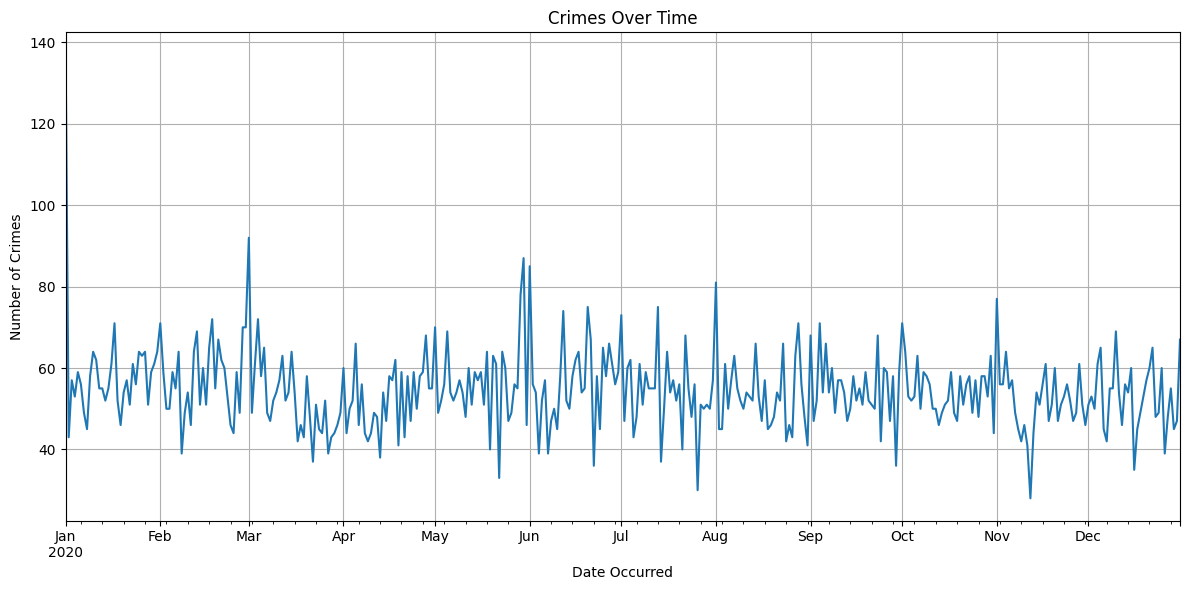

In [49]:
# Line plot
train_data2['Date_Occurred'] = pd.to_datetime(train_data2['Date_Occurred'])
crimes_over_time = train_data2.groupby('Date_Occurred').size()

plt.figure(figsize=(12, 6))
crimes_over_time.plot()
plt.title('Crimes Over Time')
plt.xlabel('Date Occurred')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
crimes_over_time

Date_Occurred
2020-01-01    137
2020-01-02     43
2020-01-03     57
2020-01-04     53
2020-01-05     59
             ... 
2020-12-27     48
2020-12-28     55
2020-12-29     45
2020-12-30     47
2020-12-31     67
Length: 366, dtype: int64

### We can see there is a sudden rise in the number of crimes occurred in the months of March, June and August

# Feature Engineering 1 - 
## Splitting the columns Date_Reported and Date_Occurred

In [51]:
# Splitting the columns Date_Reported and Date_Occurred into columns
# Month_Reported, Day_Reported, Year_Reported and Month_Occurred, 
# Day_Occurred, Year_Occurred respectively
# Coverting the Time_Occurred column to Hour_Occurred by dividing with 100
train_data2['Date_Reported'] = pd.to_datetime(train_data2['Date_Reported'])
train_data2['Date_Occurred'] = pd.to_datetime(train_data2['Date_Occurred'])
train_data2['Month_Reported'] = train_data2['Date_Reported'].dt.month
train_data2['Day_Reported'] = train_data2['Date_Reported'].dt.day
train_data2['Year_Reported'] = train_data2['Date_Reported'].dt.year
train_data2['Month_Occurred'] = train_data2['Date_Occurred'].dt.month
train_data2['Day_Occurred'] = train_data2['Date_Occurred'].dt.day
train_data2['Year_Occurred'] = train_data2['Date_Occurred'].dt.year
train_data2['Hour_Occurred'] = (train_data2['Time_Occurred'] // 100).astype(int)

/tmp/ipykernel_33/3922262371.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data2['Date_Reported'] = pd.to_datetime(train_data2['Date_Reported'])


In [52]:
train_data2.columns

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code', 'Location', 'Date_Reported', 'Date_Occurred',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category', 'Month_Reported',
       'Day_Reported', 'Year_Reported', 'Month_Occurred', 'Day_Occurred',
       'Year_Occurred', 'Hour_Occurred'],
      dtype='object')

In [53]:
# Dropping the columns Date_Reported and Date_Occurred
train_data2=train_data2.drop(['Date_Reported', 'Date_Occurred', 'Time_Occurred'],axis=1)
train_data2.columns

Index(['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
       'Victim_Age', 'Premise_Code', 'Weapon_Used_Code', 'Location',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category', 'Month_Reported',
       'Day_Reported', 'Year_Reported', 'Month_Occurred', 'Day_Occurred',
       'Year_Occurred', 'Hour_Occurred'],
      dtype='object')

In [54]:
# Following the same steps for testing data
test_data2['Date_Reported'] = pd.to_datetime(test_data2['Date_Reported'])
test_data2['Date_Occurred'] = pd.to_datetime(test_data2['Date_Occurred'])
test_data2['Month_Reported'] = test_data2['Date_Reported'].dt.month
test_data2['Day_Reported'] = test_data2['Date_Reported'].dt.day
test_data2['Year_Reported'] = test_data2['Date_Reported'].dt.year
test_data2['Month_Occurred'] = test_data2['Date_Occurred'].dt.month
test_data2['Day_Occurred'] = test_data2['Date_Occurred'].dt.day
test_data2['Year_Occurred'] = test_data2['Date_Occurred'].dt.year
test_data2['Hour_Occurred'] = (test_data2['Time_Occurred'] // 100).astype(int)

/tmp/ipykernel_33/2755350169.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data2['Date_Reported'] = pd.to_datetime(test_data2['Date_Reported'])
/tmp/ipykernel_33/2755350169.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data2['Date_Occurred'] = pd.to_datetime(test_data2['Date_Occurred'])


In [55]:
test_data2.columns

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code', 'Location', 'Date_Reported', 'Date_Occurred',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Month_Reported', 'Day_Reported', 'Year_Reported',
       'Month_Occurred', 'Day_Occurred', 'Year_Occurred', 'Hour_Occurred'],
      dtype='object')

In [56]:
test_data2=test_data2.drop(['Date_Reported', 'Date_Occurred', 'Time_Occurred'],axis=1)
test_data2.columns

Index(['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
       'Victim_Age', 'Premise_Code', 'Weapon_Used_Code', 'Location',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Month_Reported', 'Day_Reported', 'Year_Reported',
       'Month_Occurred', 'Day_Occurred', 'Year_Occurred', 'Hour_Occurred'],
      dtype='object')

In [57]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               20000 non-null  float64
 1   Longitude              20000 non-null  float64
 2   Area_ID                20000 non-null  float64
 3   Reporting_District_no  20000 non-null  float64
 4   Part 1-2               20000 non-null  float64
 5   Victim_Age             20000 non-null  float64
 6   Premise_Code           20000 non-null  float64
 7   Weapon_Used_Code       20000 non-null  float64
 8   Location               20000 non-null  object 
 9   Area_Name              20000 non-null  object 
 10  Modus_Operandi         20000 non-null  object 
 11  Victim_Sex             20000 non-null  object 
 12  Victim_Descent         20000 non-null  object 
 13  Premise_Description    20000 non-null  object 
 14  Weapon_Description     20000 non-null  object 
 15  St

In [58]:
test_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               5000 non-null   float64
 1   Longitude              5000 non-null   float64
 2   Area_ID                5000 non-null   float64
 3   Reporting_District_no  5000 non-null   float64
 4   Part 1-2               5000 non-null   float64
 5   Victim_Age             5000 non-null   float64
 6   Premise_Code           5000 non-null   float64
 7   Weapon_Used_Code       5000 non-null   float64
 8   Location               5000 non-null   object 
 9   Area_Name              5000 non-null   object 
 10  Modus_Operandi         5000 non-null   object 
 11  Victim_Sex             5000 non-null   object 
 12  Victim_Descent         5000 non-null   object 
 13  Premise_Description    5000 non-null   object 
 14  Weapon_Description     5000 non-null   object 
 15  Stat

# Data Visualization

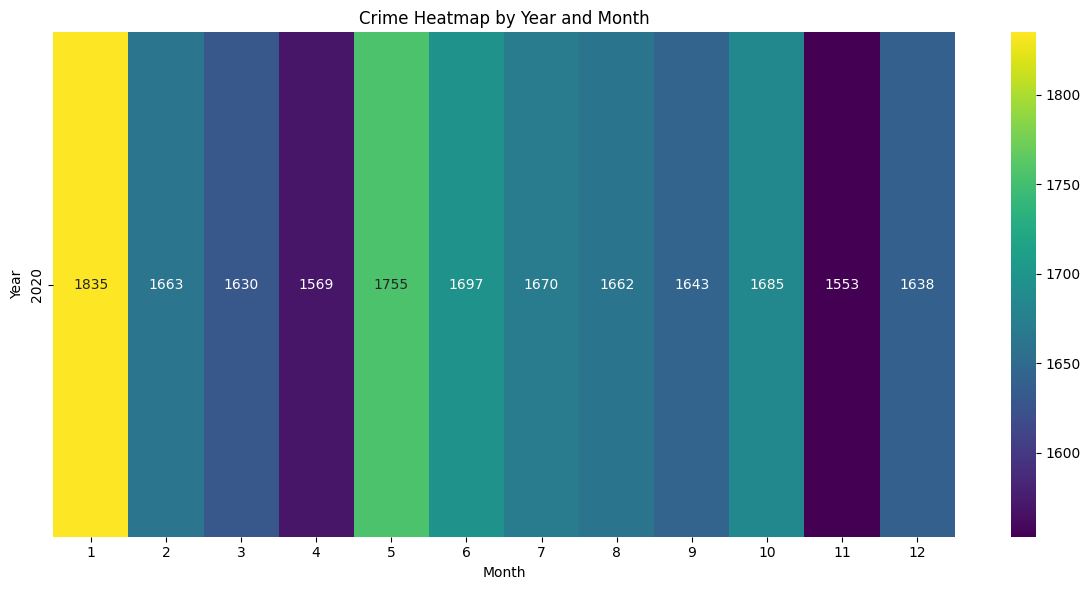

In [59]:
heatmap_data = train_data2.pivot_table(index='Year_Occurred', columns='Month_Occurred', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Crime Heatmap by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

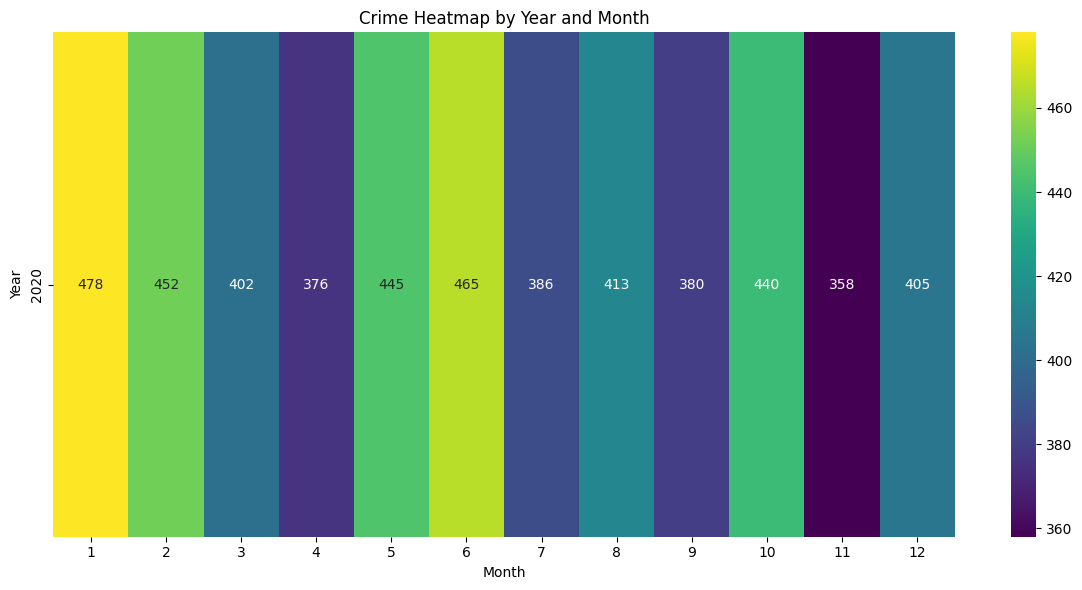

In [60]:
heatmap_data = test_data2.pivot_table(index='Year_Occurred', columns='Month_Occurred', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
plt.title('Crime Heatmap by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

### We can observe that the highest number of crimes occur in January (1835 in training dataset and 478 in testing dataset) and remain relatively consistent throughout the year.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


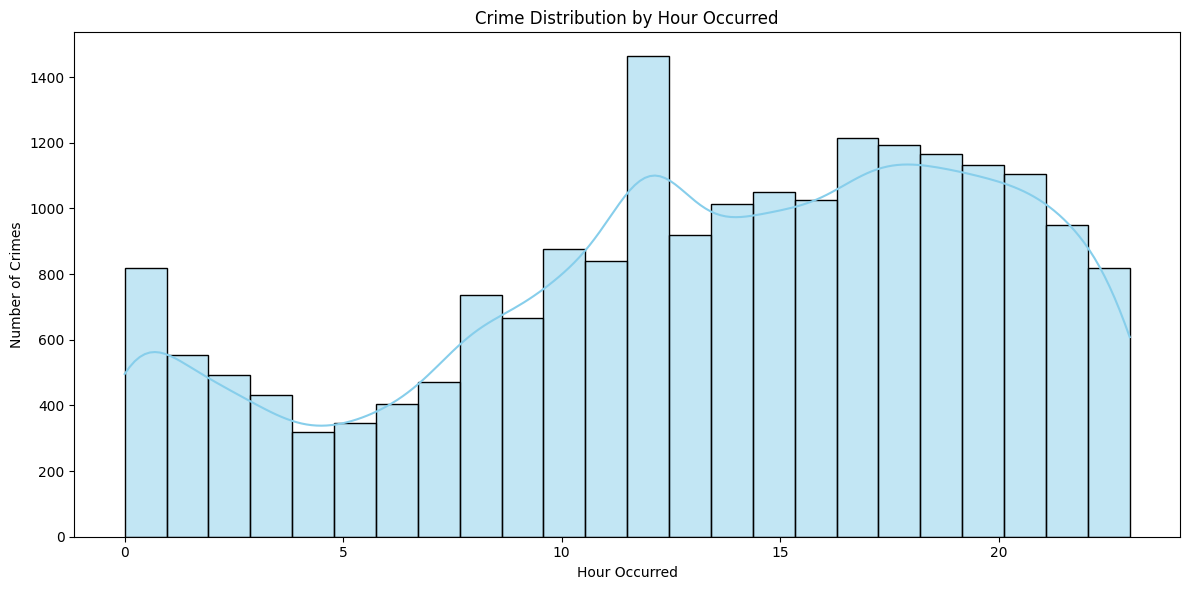

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data2, x='Hour_Occurred', bins=24, kde=True, color='skyblue')
plt.title('Crime Distribution by Hour Occurred')
plt.xlabel('Hour Occurred')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


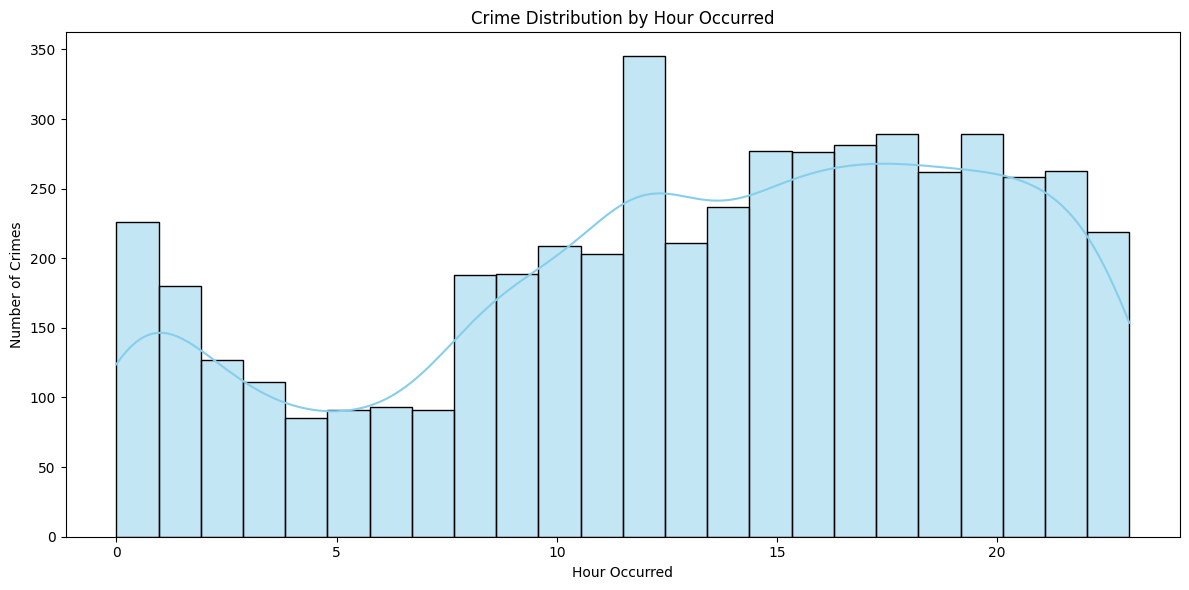

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(test_data2, x='Hour_Occurred', bins=24, kde=True, color='skyblue')
plt.title('Crime Distribution by Hour Occurred')
plt.xlabel('Hour Occurred')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

### As we can see at 12pm the number of crimes occurred is highest. This indicates a peak time for occurrance of crimes.

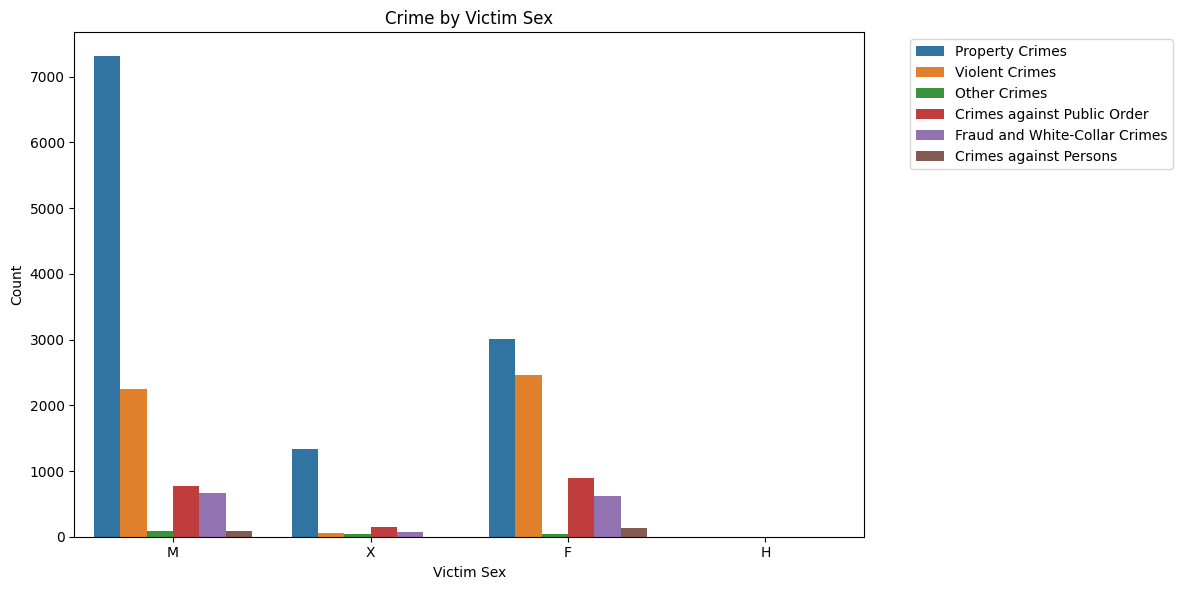

In [63]:
# Bar plot (Victim Sex)
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data2, x='Victim_Sex', hue='Crime_Category')
plt.title('Crime by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Most of the Property Crimes have victims that are males

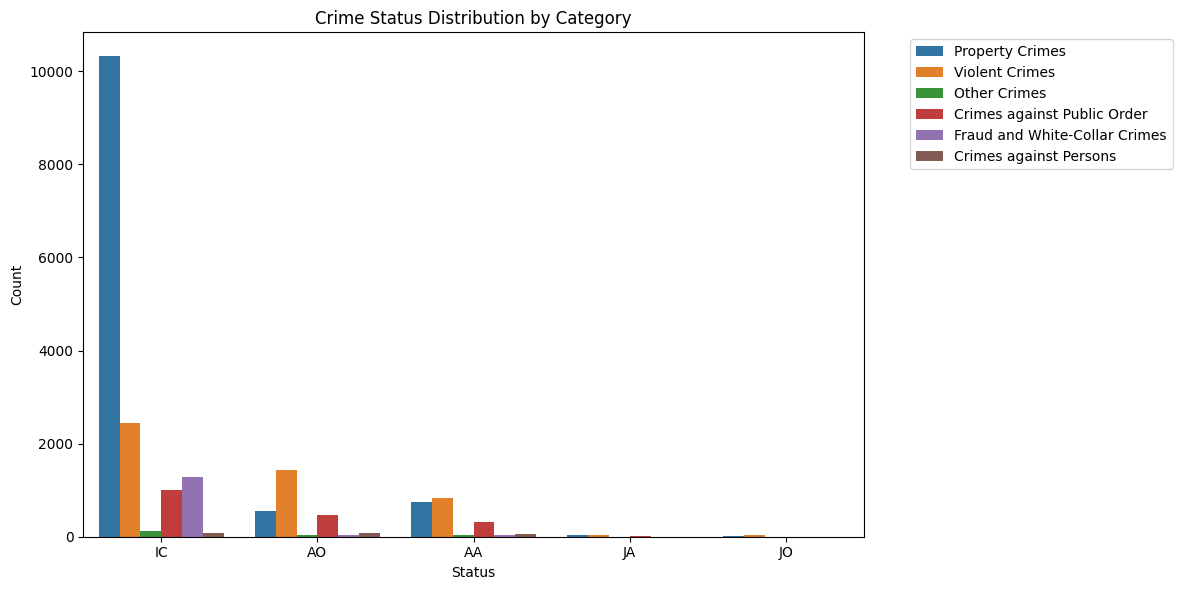

In [64]:
# Bar plot (Status)
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data2, x='Status', hue='Crime_Category')
plt.title('Crime Status Distribution by Category')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Most of the Property Crime cases are categorized as IC (Invest Cont) status

                       Latitude  Longitude  Victim_Age   Area_ID  \
Latitude               1.000000  -0.998910   -0.000276  0.018411   
Longitude             -0.998910   1.000000    0.002145 -0.006480   
Victim_Age            -0.000276   0.002145    1.000000  0.022927   
Area_ID                0.018411  -0.006480    0.022927  1.000000   
Reporting_District_no  0.017928  -0.006139    0.022351  0.999024   
Part 1-2              -0.036357   0.036373    0.195799 -0.002518   
Premise_Code          -0.011293   0.011205    0.198947  0.004045   
Weapon_Used_Code      -0.009591   0.010421    0.017502 -0.017012   
Month_Occurred        -0.026309   0.025428   -0.022376  0.001464   
Day_Occurred          -0.006022   0.006124   -0.012263 -0.005369   
Month_Reported        -0.025968   0.025013   -0.029160 -0.003898   
Day_Reported          -0.009866   0.009911   -0.004141 -0.009110   
Hour_Occurred          0.006258  -0.005639   -0.024250  0.012082   

                       Reporting_District_no  P

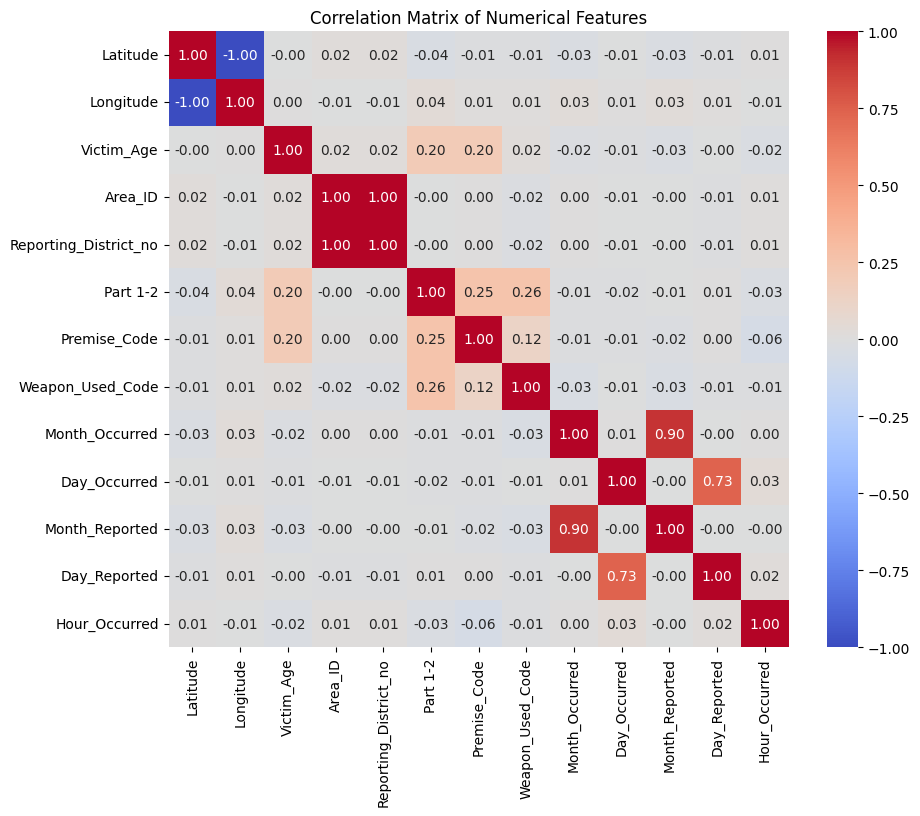

In [65]:
# Displaying the correlation matrix
numerical_features = ['Latitude', 'Longitude', 'Victim_Age', 'Area_ID',
                      'Reporting_District_no', 'Part 1-2', 'Premise_Code',
                      'Weapon_Used_Code', 'Month_Occurred', 'Day_Occurred', 
                      'Month_Reported', 'Day_Reported', 'Hour_Occurred']

correlation_matrix = train_data2[numerical_features].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Engineering 2 -

In [66]:
# Viewing the unique values of columns Year_Occurred and Year_Reported
print(train_data2['Year_Occurred'].unique())
print(train_data2['Year_Reported'].unique())

[2020]
[2020 2021 2022 2024 2023]


### We notice that all of the crimes have occurred in the year 2020 however they have been reported over the years 2020 to 2024

In [67]:
# Printing the shape of training and testing data
print("training data shape =",train_data2.shape)
print("testing data shape =",test_data2.shape)

training data shape = (20000, 25)
testing data shape = (5000, 24)


In [68]:
train_data2 = train_data2.drop(columns=['Area_Name', 'Location', 'Premise_Description', 'Weapon_Description','Status_Description'])


In [69]:
test_data2 = test_data2.drop(columns=['Area_Name', 'Location', 'Premise_Description', 'Weapon_Description','Status_Description'])

### From the correlation matrix there is strong positive correlation (1)  between Reporting_District_no and Area_ID, hence one of these columns can be dropped

In [70]:
train_data2 = train_data2.drop(columns=['Reporting_District_no','Longitude'])

In [71]:
test_data2 = test_data2.drop(columns=['Reporting_District_no','Longitude'])

In [72]:
# Printing the shape of training and testing data
print("training data shape =",train_data2.shape)
print("testing data shape =",test_data2.shape)

training data shape = (20000, 18)
testing data shape = (5000, 17)


----------------

# Splitting the dataset into features and target

In [73]:
# Obtain and the features in variable x and category in variable y
x = train_data2.drop("Crime_Category", axis=1)
y = train_data2["Crime_Category"]

In [74]:
# Printing the shapes of x and y
print("X Shape =",x.shape)
print("Y Shape =",y.shape)

X Shape = (20000, 17)
Y Shape = (20000,)


In [75]:
x["Modus_Operandi"]=x["Modus_Operandi"].apply(lambda x:str(x).split(" ") if x else [])
test_data2["Modus_Operandi"]=test_data2["Modus_Operandi"].apply(lambda x:str(x).split(" ") if x else [])

In [76]:
x["Modus_Operandi"]

0                                                  [0385]
1        [0906, 0352, 0371, 0446, 1822, 0344, 0416, 0417]
2                                            [0329, 1202]
3                                            [0329, 1300]
4                    [0416, 0945, 1822, 0400, 0417, 0344]
                               ...                       
19995                            [0416, 0446, 2004, 0913]
19996                      [1822, 0209, 0344, 1414, 1420]
19997                                  [0344, 1822, 1420]
19998                [1202, 2038, 0913, 0602, 1242, 0553]
19999                                              [0344]
Name: Modus_Operandi, Length: 20000, dtype: object

In [77]:
mlb=MultiLabelBinarizer()

feature_array=mlb.fit_transform(x['Modus_Operandi'])
x=pd.concat([x,pd.DataFrame(feature_array,columns=mlb.classes_)],axis=1)

feature_array2=mlb.transform(test_data2['Modus_Operandi'])
test_data2=pd.concat([test_data2,pd.DataFrame(feature_array2,columns=mlb.classes_)],axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['0218', '0306', '0320', '0393', '0403', '0518', '0540', '0854', '1011', '1231', '1255', '1314', '2026', '2043', '2044', '2208', '2308', '3030'] will be ignored
  warnings.warn(


In [78]:
# Drop the original 'Modus_Operandi' column after concatenation
x = x.drop("Modus_Operandi", axis=1)
test_data2 = test_data2.drop("Modus_Operandi", axis=1)

In [79]:
print(x.shape)
print(test_data2.shape)

(20000, 497)
(5000, 497)


In [80]:
# Creating Column Transformer named 'preprocessor' for scaling the 
# numerical values and encoding the categorical values

numerical_features = ['Latitude', 'Victim_Age']

categorical_features = ['Area_ID', 'Part 1-2', 'Premise_Code',
                        'Weapon_Used_Code','Victim_Sex', 'Victim_Descent', 
                        'Status']

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features)
], remainder='passthrough')


In [81]:
# Apply ColumnTransformer
x_train_preprocessed = preprocessor.fit_transform(x)
x_test_preprocessed = preprocessor.transform(test_data2)

In [82]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

In [83]:
y_train_encoded

array([4, 4, 4, ..., 4, 1, 4])

In [84]:
# Split the training data to obtain training and validation sets
x_train,x_val,y_train,y_val = train_test_split(x_train_preprocessed,y_train_encoded,test_size=0.2,random_state=42)

In [85]:
print(type(y_train[0]))
print(type(y_val[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(16000, 814)
(16000,)
(4000, 814)
(4000,)


--------------


# 1. XGBClassifier

In [183]:
# Create a pipeline for XGBClassifier
xgb_pipeline = Pipeline(steps=[
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Define hyperparameters for tuning
param_grid_xgb = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 6],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, n_jobs=-1, error_score='raise')
try:
    grid_search_xgb.fit(x_train, y_train)
    
    # Print best parameters
    print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

    # Predict and evaluate
    y_val_pred_xgb = grid_search_xgb.predict(x_val)
    y_val_pred_xgb_decoded = label_encoder.inverse_transform(y_val_pred_xgb)
    y_val_decoded = label_encoder.inverse_transform(y_val)
    print("Validation Accuracy :", accuracy_score(y_val_decoded, y_val_pred_xgb_decoded))
    print("Classification Report :\n", classification_report(y_val_decoded, y_val_pred_xgb_decoded))
except ValueError as e:
    print("Error during fitting:", e)

Best Parameters for XGBoost: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Validation Accuracy : 0.95475
Classification Report :
                                precision    recall  f1-score   support

       Crimes against Persons       0.70      0.66      0.68        32
  Crimes against Public Order       0.84      0.83      0.84       374
Fraud and White-Collar Crimes       0.94      0.94      0.94       267
                 Other Crimes       0.54      0.20      0.29        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.93      0.96      0.95       989

                     accuracy                           0.95      4000
                    macro avg       0.82      0.76      0.78      4000
                 weighted avg       0.95      0.95      0.95      4000



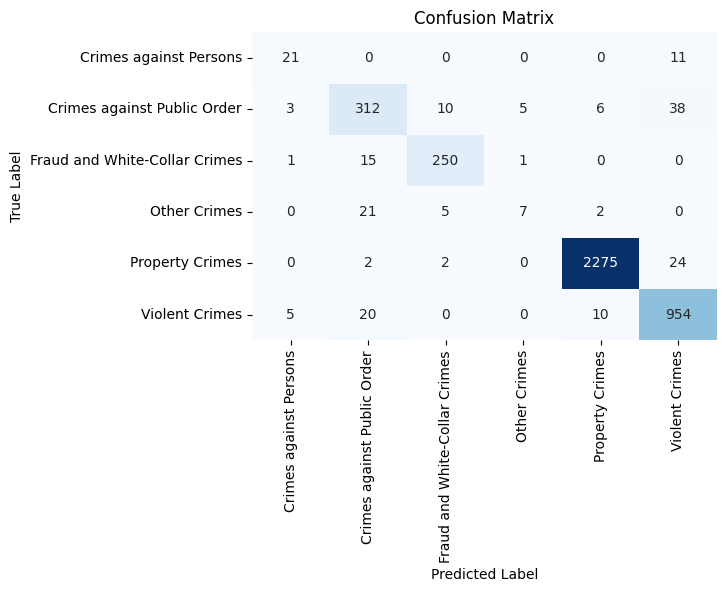

In [199]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_decoded, y_val_pred_xgb_decoded)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'], 
            yticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [191]:
# Predicting the categories of the test data
test_preds_encoded = grid_search_xgb.predict(x_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [192]:
# Creating submission table
submission1 = pd.DataFrame({"ID": range(1,len(test_preds)+1), 
                           "Crime_Category": test_preds})
print(submission1)

        ID                 Crime_Category
0        1                 Violent Crimes
1        2                Property Crimes
2        3  Fraud and White-Collar Crimes
3        4                Property Crimes
4        5    Crimes against Public Order
...    ...                            ...
4995  4996                Property Crimes
4996  4997                Property Crimes
4997  4998                 Violent Crimes
4998  4999                 Violent Crimes
4999  5000                Property Crimes

[5000 rows x 2 columns]


In [193]:
# # Creating submission csv file
# submission1.to_csv('submission.csv',index=False)

------------

# 2. SVM

In [194]:
# Create a pipeline for SVM
svm_pipeline = Pipeline(steps=[
    ('classifier', SVC())
])
# Define hyperparameters for tuning
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(x_train, y_train)

# Print best parameters
print("Best Parameters for SVM :\n", grid_search_svm.best_params_)

# Predict and evaluate
y_val_pred_svm = grid_search_svm.predict(x_val)
y_val_pred_svm_decoded = label_encoder.inverse_transform(y_val_pred_svm)
y_val_decoded = label_encoder.inverse_transform(y_val)
print("Validation Accuracy :", accuracy_score(y_val_decoded, y_val_pred_svm_decoded))
print("Classification Report :\n", classification_report(y_val_decoded, y_val_pred_svm_decoded))


Best Parameters for SVM :
 {'classifier__C': 100, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Validation Accuracy : 0.944
Classification Report :
                                precision    recall  f1-score   support

       Crimes against Persons       0.47      0.44      0.45        32
  Crimes against Public Order       0.80      0.82      0.81       374
Fraud and White-Collar Crimes       0.93      0.93      0.93       267
                 Other Crimes       0.67      0.29      0.40        35
              Property Crimes       0.99      0.98      0.98      2303
               Violent Crimes       0.92      0.94      0.93       989

                     accuracy                           0.94      4000
                    macro avg       0.80      0.73      0.75      4000
                 weighted avg       0.94      0.94      0.94      4000



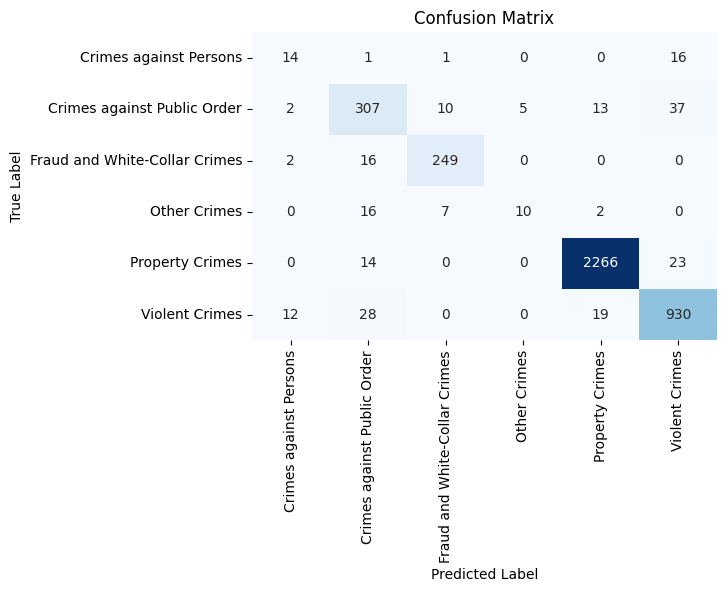

In [197]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_decoded, y_val_pred_svm_decoded)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'], 
            yticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [200]:
# Predicting the categories of the test data
test_preds_encoded = grid_search_svm.predict(x_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [201]:
# Creating submission table
submission2 = pd.DataFrame({"ID": range(1,len(test_preds)+1), 
                           "Crime_Category": test_preds})
print(submission2)

        ID                 Crime_Category
0        1                 Violent Crimes
1        2                Property Crimes
2        3  Fraud and White-Collar Crimes
3        4                Property Crimes
4        5    Crimes against Public Order
...    ...                            ...
4995  4996                Property Crimes
4996  4997                Property Crimes
4997  4998                 Violent Crimes
4998  4999                 Violent Crimes
4999  5000                Property Crimes

[5000 rows x 2 columns]


In [202]:
# # Creating submission csv file
# submission2.to_csv('submission.csv',index=False)

---------------------

# 3. Bagging

In [203]:
# Create a pipeline for Bagging
bagging_pipeline = Pipeline(steps=[
    ('classifier', BaggingClassifier(estimator=DecisionTreeClassifier()))
])

# Define hyperparameters for tuning
param_grid_bagging = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__estimator__max_depth': [None, 10, 20, 30],
    'classifier__estimator__min_samples_split': [2, 5, 10],
    'classifier__estimator__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_bagging = GridSearchCV(bagging_pipeline, param_grid_bagging, cv=5, n_jobs=-1)
grid_search_bagging.fit(x_train, y_train)

# Print best parameters
print("Best Parameters for Bagging:", grid_search_bagging.best_params_)

# Predict and evaluate
y_val_pred_bagging = grid_search_bagging.predict(x_val)
y_val_pred_bagging_decoded = label_encoder.inverse_transform(y_val_pred_bagging)
y_val_decoded = label_encoder.inverse_transform(y_val)
print("Validation Accuracy :", accuracy_score(y_val_decoded, y_val_pred_bagging_decoded))
print("Classification Report :\n", classification_report(y_val_decoded, y_val_pred_bagging_decoded))

Best Parameters for Bagging: {'classifier__estimator__max_depth': 20, 'classifier__estimator__min_samples_leaf': 2, 'classifier__estimator__min_samples_split': 5, 'classifier__n_estimators': 100}
Validation Accuracy : 0.94675
Classification Report :
                                precision    recall  f1-score   support

       Crimes against Persons       0.75      0.66      0.70        32
  Crimes against Public Order       0.81      0.80      0.81       374
Fraud and White-Collar Crimes       0.88      0.94      0.91       267
                 Other Crimes       0.45      0.14      0.22        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.93      0.95      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.80      0.75      0.76      4000
                 weighted avg       0.94      0.95      0.94      4000



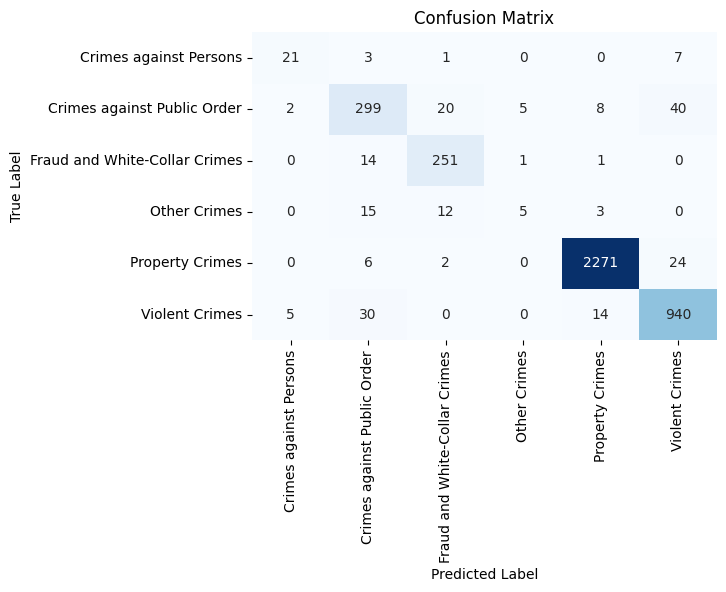

In [204]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_decoded, y_val_pred_bagging_decoded)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'], 
            yticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [205]:
# Predicting the categories of the test data
test_preds_encoded = grid_search_bagging.predict(x_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [206]:
# Creating submission table
submission3 = pd.DataFrame({"ID": range(1,len(test_preds)+1), 
                           "Crime_Category": test_preds})
print(submission3)

        ID                 Crime_Category
0        1                 Violent Crimes
1        2                Property Crimes
2        3  Fraud and White-Collar Crimes
3        4                Property Crimes
4        5    Crimes against Public Order
...    ...                            ...
4995  4996                Property Crimes
4996  4997                Property Crimes
4997  4998                 Violent Crimes
4998  4999                 Violent Crimes
4999  5000                Property Crimes

[5000 rows x 2 columns]


In [207]:
# # Creating submission csv file
# submission3.to_csv('submission.csv',index=False)

-------------------

# 4. MLP

In [83]:
# Create a pipeline for MLP
mlp_pipeline = Pipeline(steps=[
    ('classifier', MLPClassifier(max_iter=500, early_stopping=True))
])

# Define hyperparameters for tuning
param_grid_mlp = {
    'classifier__hidden_layer_sizes': [(50,), (100,)],
    'classifier__activation': ['relu'],
    'classifier__solver': ['adam'],
    'classifier__alpha': [0.0001, 0.001],
    'classifier__learning_rate': ['constant']
}

# Perform grid search with cross-validation
grid_search_mlp = GridSearchCV(mlp_pipeline, param_grid_mlp, cv=3, n_jobs=-1)
grid_search_mlp.fit(x_train, y_train)

# Print best parameters
print("Best Parameters for MLP :", grid_search_mlp.best_params_)

# Predict and evaluate
y_val_pred_mlp = grid_search_mlp.predict(x_val)
y_val_pred_mlp_decoded = label_encoder.inverse_transform(y_val_pred_mlp)
y_val_decoded = label_encoder.inverse_transform(y_val)

print("Validation Accuracy :", accuracy_score(y_val_decoded, y_val_pred_mlp_decoded))
print("Classification Report :\n", classification_report(y_val_decoded, y_val_pred_mlp_decoded))

Best Parameters for MLP : {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100,), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}
Validation Accuracy : 0.94175
Classification Report :
                                precision    recall  f1-score   support

       Crimes against Persons       0.59      0.41      0.48        32
  Crimes against Public Order       0.84      0.83      0.83       374
Fraud and White-Collar Crimes       0.93      0.92      0.92       267
                 Other Crimes       0.50      0.03      0.05        35
              Property Crimes       0.97      0.98      0.98      2303
               Violent Crimes       0.92      0.95      0.94       989

                     accuracy                           0.94      4000
                    macro avg       0.79      0.69      0.70      4000
                 weighted avg       0.94      0.94      0.94      4000



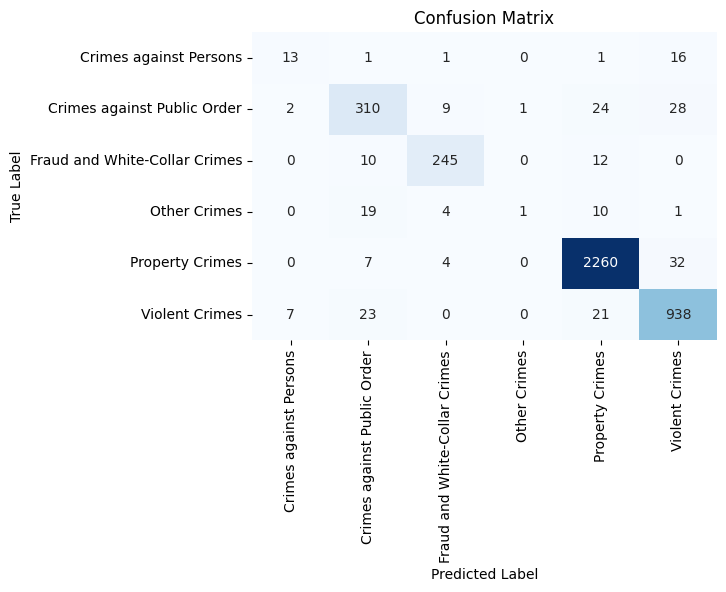

In [84]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_decoded, y_val_pred_mlp_decoded)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'], 
            yticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [85]:
# Predicting the categories of the test data
test_preds_encoded = grid_search_mlp.predict(x_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [86]:
# Creating submission table
submission4 = pd.DataFrame({"ID": range(1,len(test_preds)+1), 
                           "Crime_Category": test_preds})
print(submission4)

        ID                 Crime_Category
0        1                 Violent Crimes
1        2                Property Crimes
2        3  Fraud and White-Collar Crimes
3        4                Property Crimes
4        5    Crimes against Public Order
...    ...                            ...
4995  4996                Property Crimes
4996  4997                Property Crimes
4997  4998                 Violent Crimes
4998  4999                 Violent Crimes
4999  5000                Property Crimes

[5000 rows x 2 columns]


In [87]:
# # Creating submission csv file
# submission4.to_csv('submission.csv',index=False)

--------------------

# 5. Classification and Regression Trees (CART)

In [85]:
# Create a pipeline for CART
cart_pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier())
])
# Define hyperparameters for tuning
param_grid_cart = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_cart = GridSearchCV(cart_pipeline, param_grid_cart, cv=5, n_jobs=-1)
grid_search_cart.fit(x_train, y_train)

# Print best parameters
print("Best Parameters for CART:", grid_search_cart.best_params_)

# Predict and evaluate
y_val_pred_cart = grid_search_cart.predict(x_val)
y_val_pred_cart_decoded = label_encoder.inverse_transform(y_val_pred_cart)
y_val_decoded = label_encoder.inverse_transform(y_val)

print("Validation Accuracy :", accuracy_score(y_val_decoded, y_val_pred_cart_decoded))
print("Classification Report :\n", classification_report(y_val_decoded, y_val_pred_cart_decoded))

Best Parameters for CART: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Validation Accuracy : 0.94
Classification Report :
                                precision    recall  f1-score   support

       Crimes against Persons       0.55      0.81      0.66        32
  Crimes against Public Order       0.80      0.79      0.80       374
Fraud and White-Collar Crimes       0.92      0.91      0.91       267
                 Other Crimes       0.38      0.29      0.33        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.93      0.93      0.93       989

                     accuracy                           0.94      4000
                    macro avg       0.76      0.79      0.77      4000
                 weighted avg       0.94      0.94      0.94      4000



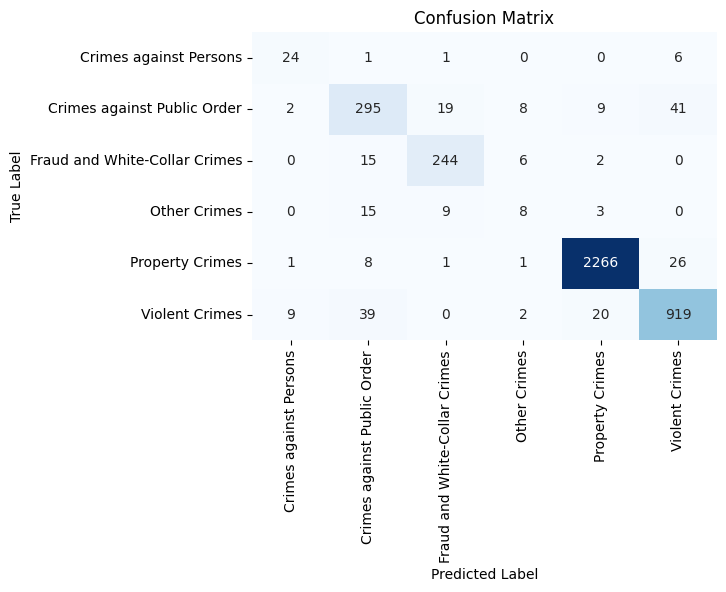

In [90]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_decoded, y_val_pred_cart_decoded)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'], 
            yticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [91]:
# Predicting the categories of the test data
test_preds_encoded = grid_search_cart.predict(x_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [92]:
# Creating submission table
submission5 = pd.DataFrame({"ID": range(1,len(test_preds)+1), 
                           "Crime_Category": test_preds})
print(submission5)

        ID                 Crime_Category
0        1                 Violent Crimes
1        2                Property Crimes
2        3  Fraud and White-Collar Crimes
3        4                Property Crimes
4        5    Crimes against Public Order
...    ...                            ...
4995  4996                Property Crimes
4996  4997                Property Crimes
4997  4998                 Violent Crimes
4998  4999                 Violent Crimes
4999  5000                Property Crimes

[5000 rows x 2 columns]


In [93]:
# # Creating submission csv file
# submission5.to_csv('submission.csv',index=False)

----------------

# 6. RandomForestClassifier

In [88]:
# Create a pipeline with RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameters for tuning
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],        
    'classifier__max_depth': [None, 10, 20, 30],        
    'classifier__min_samples_split': [2, 5, 10],       
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Print best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predict and evaluate
y_val_pred_rf = grid_search_rf.predict(x_val)
y_val_pred_rf_decoded = label_encoder.inverse_transform(y_val_pred_rf)
y_val_decoded = label_encoder.inverse_transform(y_val)

print("Validation Accuracy:", accuracy_score(y_val_decoded, y_val_pred_rf_decoded))
print("Classification Report:\n", classification_report(y_val_decoded, y_val_pred_rf_decoded))

Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Validation Accuracy: 0.94925
Classification Report:
                                precision    recall  f1-score   support

       Crimes against Persons       0.56      0.16      0.24        32
  Crimes against Public Order       0.85      0.81      0.83       374
Fraud and White-Collar Crimes       0.93      0.94      0.94       267
                 Other Crimes       1.00      0.06      0.11        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.91      0.97      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.87      0.65      0.67      4000
                 weighted avg       0.95      0.95      0.94      4000



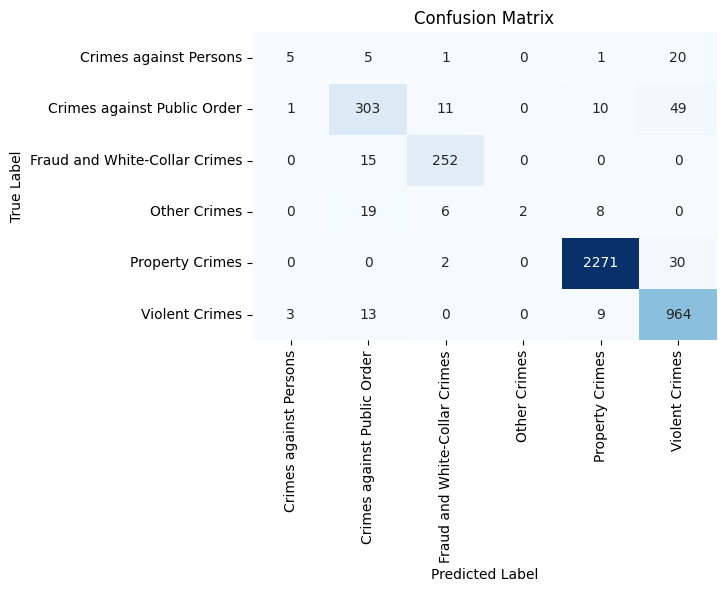

In [89]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_decoded, y_val_pred_rf_decoded)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'], 
            yticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [90]:
# Predicting the categories of the test data
test_preds_encoded = grid_search_rf.predict(x_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [91]:
# Creating submission table
submission6 = pd.DataFrame({"ID": range(1,len(test_preds)+1), 
                           "Crime_Category": test_preds})
print(submission6)

        ID                 Crime_Category
0        1                 Violent Crimes
1        2                Property Crimes
2        3  Fraud and White-Collar Crimes
3        4                Property Crimes
4        5    Crimes against Public Order
...    ...                            ...
4995  4996                Property Crimes
4996  4997                Property Crimes
4997  4998                 Violent Crimes
4998  4999                 Violent Crimes
4999  5000                Property Crimes

[5000 rows x 2 columns]


In [ ]:
# # Creating submission csv file
# submission6.to_csv('submission.csv',index=False)

------------------

# 7. Logistic Regression

In [ ]:
# # Create a pipeline with LogisticRegression
# log_pipeline = Pipeline(steps=[
#     ('classifier', LogisticRegression(random_state=42))
# ])

# # Define hyperparameters for tuning
# param_grid_log = {
#     'classifier__C': [0.01, 0.1, 1, 10, 100],        
#     'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],  
#     'classifier__solver': ['lbfgs','saga'],
# }

# # Perform grid search with cross-validation
# grid_search_log = GridSearchCV(log_pipeline, param_grid_log, cv=5, n_jobs=-1)
# grid_search_log.fit(x_train, y_train)

# # Print best parameters
# print("Best Parameters for Logistic Regression :", grid_search_log.best_params_)

# # Predict and evaluate
# y_val_pred_log = grid_search_log.predict(x_val)
# y_val_pred_log_decoded = label_encoder.inverse_transform(y_val_pred_log)
# y_val_decoded = label_encoder.inverse_transform(y_val)

# print("Validation Accuracy :", accuracy_score(y_val_decoded, y_val_pred_log_decoded))
# print("Classification Report :\n", classification_report(y_val_decoded, y_val_pred_log_decoded))

In [ ]:
# # Calculate the confusion matrix
# cm = confusion_matrix(y_val_decoded, y_val_pred_log_decoded)

# # Plot the confusion matrix using seaborn
# plt.figure(figsize=(6,4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
#             xticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'], 
#             yticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# # Predicting the categories of the test data
# test_preds_encoded = grid_search_log.predict(x_test_preprocessed)
# test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [ ]:
# # Creating submission table
# submission7 = pd.DataFrame({"ID": range(1,len(test_preds)+1), 
#                            "Crime_Category": test_preds})
# print(submission7)

In [ ]:
# # Creating submission csv file
# submission7.to_csv('submission.csv',index=False)

----------------------

# 8. K-Nearest Neighbors (KNN) 

In [84]:
# Create a pipeline for KNN
knn_pipeline = Pipeline(steps=[
    ('classifier', KNeighborsClassifier())
])
# Define hyperparameters for tuning
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

# Print best parameters
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Predict and evaluate
y_val_pred_knn = grid_search_knn.predict(x_val)
y_val_pred_knn_decoded = label_encoder.inverse_transform(y_val_pred_knn)
y_val_decoded = label_encoder.inverse_transform(y_val)

print("Validation Accuracy :", accuracy_score(y_val_decoded, y_val_pred_knn_decoded))
print("Classification Report :\n", classification_report(y_val_decoded, y_val_pred_knn_decoded))

Best Parameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Validation Accuracy : 0.79875
Classification Report :
                                precision    recall  f1-score   support

       Crimes against Persons       0.17      0.03      0.05        32
  Crimes against Public Order       0.60      0.27      0.37       374
Fraud and White-Collar Crimes       0.72      0.55      0.62       267
                 Other Crimes       0.00      0.00      0.00        35
              Property Crimes       0.80      0.97      0.88      2303
               Violent Crimes       0.86      0.72      0.78       989

                     accuracy                           0.80      4000
                    macro avg       0.52      0.42      0.45      4000
                 weighted avg       0.78      0.80      0.78      4000



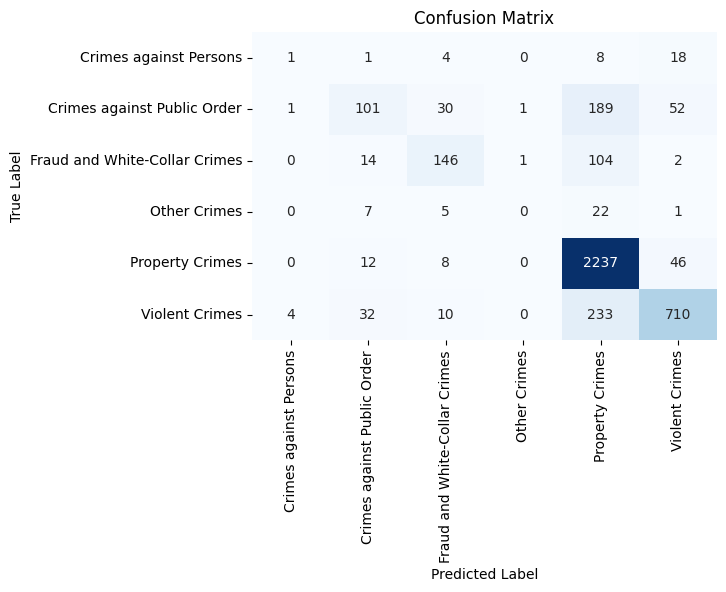

In [85]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val_decoded, y_val_pred_knn_decoded)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'], 
            yticklabels=['Crimes against Persons', 'Crimes against Public Order','Fraud and White-Collar Crimes','Other Crimes','Property Crimes','Violent Crimes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [86]:
# Predicting the categories of the test data
test_preds_encoded = grid_search_knn.predict(x_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds_encoded)

In [87]:
# Creating submission table
submission8 = pd.DataFrame({"ID": range(1,len(test_preds)+1), 
                           "Crime_Category": test_preds})
print(submission8)

        ID                 Crime_Category
0        1                 Violent Crimes
1        2                Property Crimes
2        3  Fraud and White-Collar Crimes
3        4                Property Crimes
4        5                Property Crimes
...    ...                            ...
4995  4996                Property Crimes
4996  4997                Property Crimes
4997  4998                 Violent Crimes
4998  4999                Property Crimes
4999  5000                Property Crimes

[5000 rows x 2 columns]


In [88]:
# # Creating submission csv file
# submission8.to_csv('submission.csv',index=False)

---------------

# Comparing the 8 Models

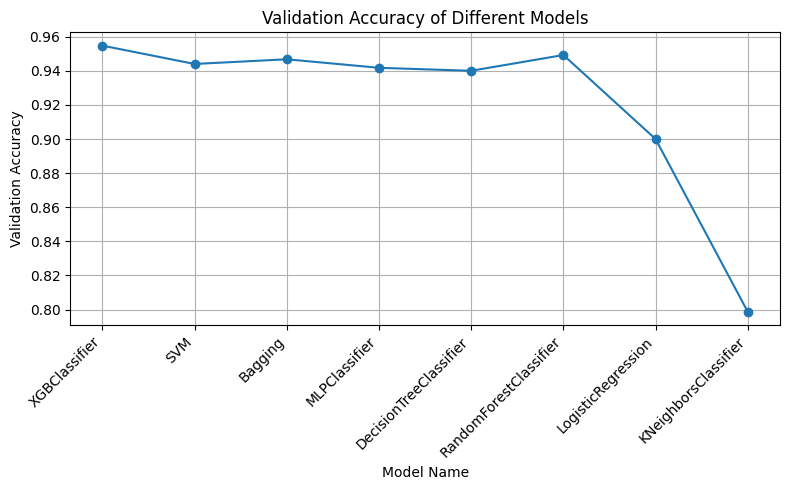

In [90]:
# Sample validation accuracies for 8 models
model_names = ["XGBClassifier", "SVM", "Bagging", "MLPClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression", "KNeighborsClassifier"]
validation_accuracies = [0.95475, 0.9440, 0.94675, 0.94175, 0.94, 0.94925, 0.90, 0.79875]

# Create line chart
plt.figure(figsize=(8, 5))  
plt.plot(model_names, validation_accuracies, marker='o', linestyle='-')  

# Customize plot
plt.xlabel("Model Name")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of Different Models")
plt.xticks(rotation=45, ha='right')  
plt.grid(True)  

# Display plot
plt.tight_layout()
plt.show()

------------------

# Conclusion !

-----------------------
------------------------